# **[Data4life] Trending YouTube Analysis**

## **Team Members**

<center>

| No. | Name                   | Student ID |
|-----|------------------------|------------|
| 1   | Trần Nguyễn Nhật Cường | 22127048   |
| 2   | Nguyễn Công Tuấn       | 22127436   |  
| 3   | Trần Đăng Tuấn         | 22127438   |

</center>

## **Overview**
This repository contains our team's analysis of the YouTube Trending Videos Dataset, which provides data on the top trending YouTube videos in USA over several months. The dataset includes information about video statistics, such as views, likes, comments, and more, collected from YouTube's top trending list.

## **Import modules**

In [298]:
# Packages for data manipulation
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## **Data Collection**

The dataset was collected using the YouTube API and is publicly available on [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new).

## **Load datasets**

We reviewed all the datasets provided and found that only `US_category_id.json` contains the complete set of categories. Therefore, we decided to select the US dataset for synchronization.

In [299]:
us_videos = pd.read_csv(filepath_or_buffer='./data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


The JSON file holds details about YouTube video categories, which help in organizing videos on the platform. Two key aspects are important: the title of the category and its assignability. Thus, we extracted only these two variables.

In [300]:
with open(file='./data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Understand the data**

The table below provides a detailed explanation of the attributes in our dataset.

<center> 

| Attribute	| Explanation |
| --------- | ----------- | 
| video_id	|Unique identifier for each video.	|
| trending_date |	Date when the video started trending. |	
| title	| Title of the video.	|
| channel_title |	Name of the channel that published the video. |
| category_id |	ID representing the category of the video (e.g., Entertainment, Music). |	
| publish_time | Date and time when the video was published.	|
| tags	| Keywords associated with the video, used for categorization or search.	|
| views	| Number of times the video has been viewed.	|
| likes	| Number of likes received by the video.	| 
| dislikes | Number of dislikes received by the video. |	
| comment_count | Number of comments on the video.	|
| thumbnail_link |	URL link to the video thumbnail. |	
| comments_disabled | Indicates whether comments are disabled for the video (True/False). |
| ratings_disabled	| Indicates whether ratings (likes/dislikes) are disabled for the video (True/False). |	
| video_error_or_removed	| Indicates whether the video has been removed or has an error (True/False). |
| description |	Text description of the video provided by the creator.	|

</center>

The table below provides a detailed explanation of the attributes in our category's dictionary (which was read from JSON file).

<center> 

| Attribute	| Explanation |
| --------- | ----------- | 
| Category ID	| A unique identifier for each category	|
| Category Title |	The name of the video category, describing its content |	
| Assignable | A boolean value indicating whether the category can be directly assigned to a video |

</center>


## **Clean data**

### **Data Overview**

In [301]:
# Check the concise summary of the dataset
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

**COMMENTS**
- Column `description` contains missing values since providing a description is **not mandatory**.
- Columns `trending_date` and `publish_time` should be converted to **datetime** type.

In [302]:
# Check the descriptive statistics of the dataset
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


**COMMENTS**

1. General Dataset Trends
- The dataset contains 40,899 rows and 16 columns.

2. Views
- The average view count is 2,360,648.79, but the standard deviation is quite high 7,397,897.64, suggesting a considerable variation in the number of views.
- 75% of videos have view counts below 2 million, whereas the highest view count reaches 225,211,923, showing that some videos attract exceptionally high number of views.
- The average view count of 2,360,648.79 is greater than the Q3 value of 1,821,337, indicating that the distribution of view counts is right-skewed.

3. Likes
- 75% of videos have like counts below 60 thousand, whereas the highest like count reaches 5,613,827, showing that some videos attract exceptionally high number of likes.
- The average like count of 74,270.40 is greater than the Q3 value of 55,332, indicating that the distribution of like counts is right-skewed.

4. Dislikes
- The average dislike count is 3,711.82, but the standard deviation is quite high 29,046.95, suggesting a considerable variation in the number of dislikes.
- 75% of videos have dislike counts below 2 thousand, whereas the highest dislike count reaches 1,674,420, showing that some videos are excetionally bad.
- The average dislike count of 3,711.82 is greater than the Q3 value of 1,936, indicating that the distribution of dislike counts is right-skewed.

5. Comment Count
- The average comment count is 8,448.51, but the standard deviation is quite high 37,452.25, suggesting a considerable variation in the number of comments.
- 75% of videos have comment counts below 6 thousand, whereas the highest comment count reaches 1,361,580, showing that some videos attract exceptionally high number of comments.
- The average comment count of 8,448.51 is greater than the Q3 value of 5,751.50, indicating that the distribution of comment counts is right-skewed.

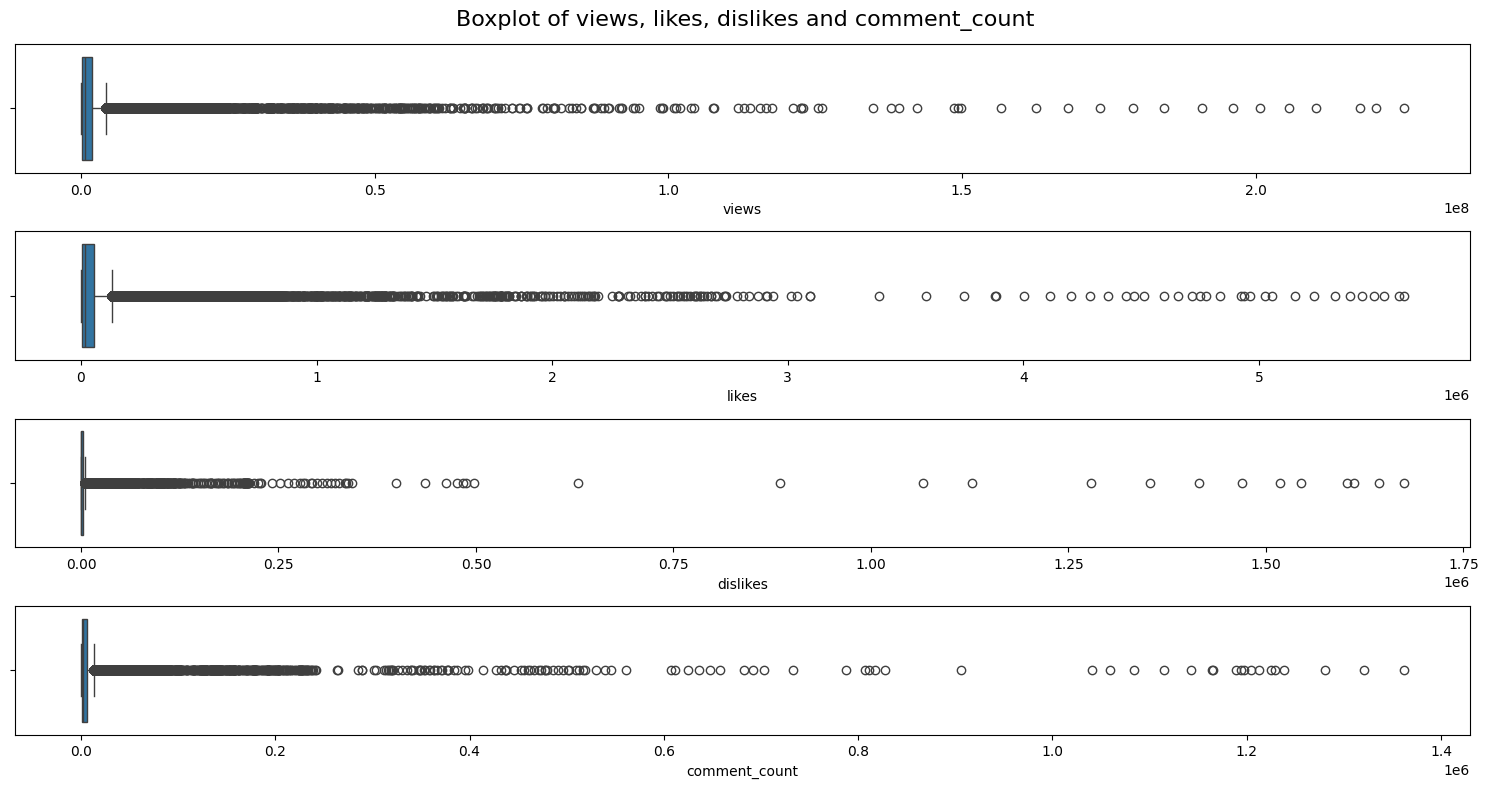

In [303]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 8))

sns.boxplot(x=us_videos['views'], ax=axes[0])
sns.boxplot(x=us_videos['likes'], ax=axes[1])
sns.boxplot(x=us_videos['dislikes'], ax=axes[2])
sns.boxplot(x=us_videos['comment_count'], ax=axes[3])

plt.suptitle(t='Boxplot of views, likes, dislikes and comment_count', fontsize=16)
plt.tight_layout()
plt.show()

As we conclude from the descriptive statistics, the distribution of `views`, `likes`, `dislikes`, and `comment_count` is right-skewed. Additionally, there are numerous videos that exhibit either very high or very low quality.

### **Handle Duplicate Rows**

In [304]:
print(f'The number of duplicate rows: {us_videos.duplicated().sum()}')

The number of duplicate rows: 48


In [305]:
# Drop duplicate rows
us_videos.drop_duplicates(inplace=True, ignore_index=True)
print(f'The number of duplicate rows after cleaning: {us_videos.duplicated().sum()}')

The number of duplicate rows after cleaning: 0


In [306]:
print(f'The number of duplicate daily records for a video: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video: 2


In [307]:
# Drop duplicate daily records for a video
us_videos.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True, ignore_index=True)
print(f'The number of duplicate daily records for a video after cleaning: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video after cleaning: 0


### **Format The Time-series Attributes**

In [308]:
# Convert column "trending_date" and "publish_time" to datetime type
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [309]:
# Create new column "category" based on the "category_id" column
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

In [310]:
# Create new column "category_assignable" based on the "category_id" column
us_videos['category_assignable'] = us_videos['category_id'].map(categories).str[1]
us_videos['category_assignable'].head()

0    True
1    True
2    True
3    True
4    True
Name: category_assignable, dtype: bool

In [311]:
# Check the final type of each column
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category                          object
category_assignable                 bool
dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [312]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


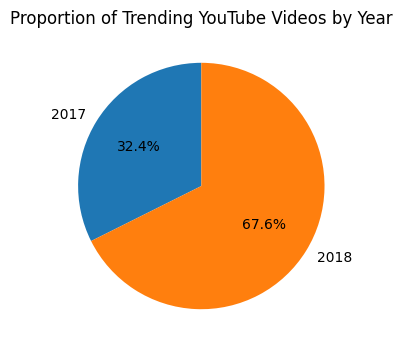

In [313]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in ***2017*** was considerably lower compared to ***2018***. Now, let's examine the start and end dates in the dataset.

In [314]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In ***2017***, the dataset covers only 2 months (November to December), whereas in ***2018***, it spans 6 months (January to June). Therefore, the difference in the number of trending videos is expected.

### **Question 2: How many videos have disabled comments?**

In [315]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

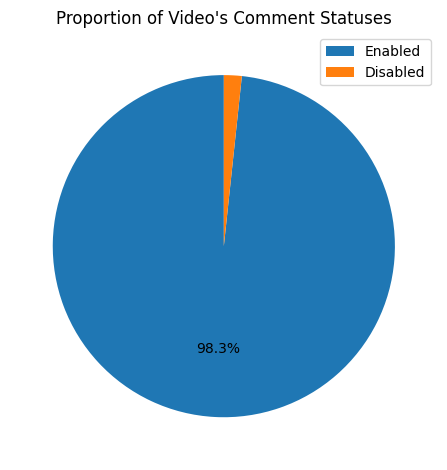

In [62]:
def autopct_func(pct, val):
    return f'{pct:.1f}%' if pct > val else ''

us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=lambda pct: autopct_func(pct, 90))
plt.title(label="Proportion of Video's Comment Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset have comments enabled, with 6,251 (accounted for 98.3%) videos having the comment section active. In contrast, only 107 videos (1.7%) have comments disabled.

### **Question 3: How many videos have disabled ratings?**

In [317]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique()

ratings_disabled
False    6327
True       32
Name: video_id, dtype: int64

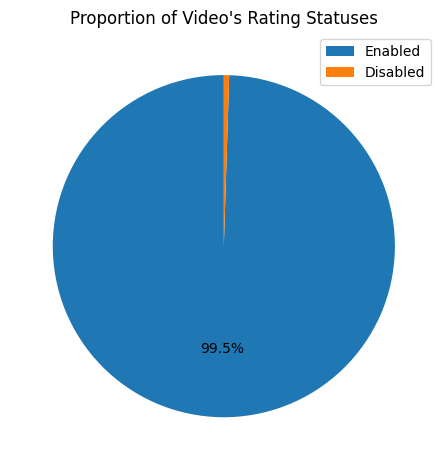

In [63]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=lambda pct: autopct_func(pct, 90))
plt.title(label="Proportion of Video's Rating Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset have rating enabled, with 6,327 (accounted for 99.5%) videos having the rating section active. In contrast, only 32 videos (0.5%) have rating disabled.

### **Question 4: How many videos have errors or have been removed?**

In [319]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique()

video_error_or_removed
False    6348
True        4
Name: video_id, dtype: int64

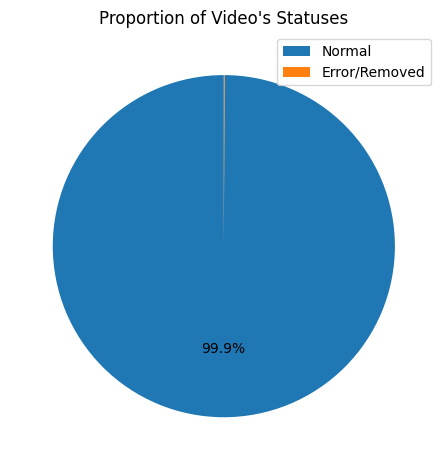

In [64]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=lambda pct: autopct_func(pct, 90))
plt.title(label="Proportion of Video's Statuses")
plt.ylabel(ylabel='')
plt.legend(['Normal', 'Error/Removed'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset are normal, with 6.348 (accounted for 99.9%) videos are being normal. In contrast, only 4 videos (0.01%) are being error/removed.

## **Videos**

### **Question 5: How long does it take for videos to start trending?**

In [321]:
trending_time = us_videos.groupby(by='video_id', as_index=False).agg(func={'publish_time': 'first', 'trending_date': 'min'})
trending_time['days_to_trending'] = (trending_time['trending_date'] - trending_time['publish_time']).dt.days + 1
trending_time['days_to_trending'].value_counts()

days_to_trending
1       2736
2       1816
3        687
4        364
5        238
        ... 
2816       1
1377       1
1035       1
140        1
1561       1
Name: count, Length: 123, dtype: int64

In [322]:
trending_time['days_to_trending_segment'] = np.where(
    trending_time['days_to_trending'] <= 1, '<= 1 day', np.where(
        trending_time['days_to_trending'] <= 7, '2 - 7 days', '> 7 days'
    )
)

trending_time['days_to_trending_segment'].value_counts()

days_to_trending_segment
2 - 7 days    3286
<= 1 day      2855
> 7 days       210
Name: count, dtype: int64

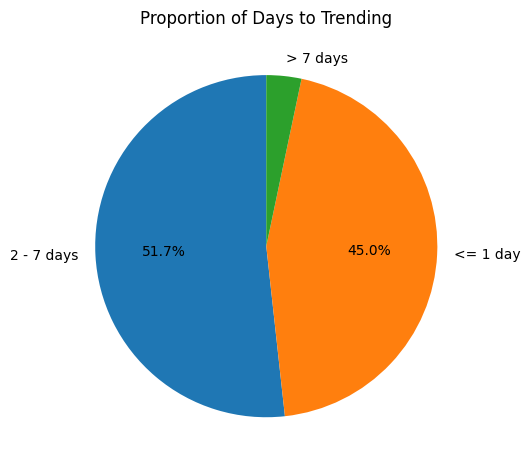

In [65]:
trending_time['days_to_trending_segment'].value_counts().plot.pie(startangle=90, autopct=lambda pct: autopct_func(pct, 10))
plt.title(label='Proportion of Days to Trending')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

**COMMENTS**

- Nearly 97% of videos trend within a week. Notably, 45% of them trend in less than a day. We can inpsect these videos to understand the reasons behind their rapid rise in popularity.

In [324]:
one_day_trending = trending_time[trending_time['days_to_trending'] <= 1].merge(right=us_videos[['video_id', 'category']].drop_duplicates(subset='video_id'), on='video_id')
one_day_trending.head()

,video_id,publish_time,trending_date,days_to_trending,days_to_trending_segment,category
0,-1yT-K3c6YI,2017-11-28 18:30:43,2017-11-29,1,<= 1 day,People & Blogs
1,-2b4qSoMnKE,2017-12-19 20:46:33,2017-12-20,1,<= 1 day,News & Politics
2,-2wRFv-mScQ,2018-02-13 01:46:14,2018-02-14,1,<= 1 day,Sports
3,-35jibKqbEo,2018-02-14 17:00:49,2018-02-15,1,<= 1 day,Music
4,-39ysKKpE7I,2018-04-23 15:37:08,2018-04-24,1,<= 1 day,Sports


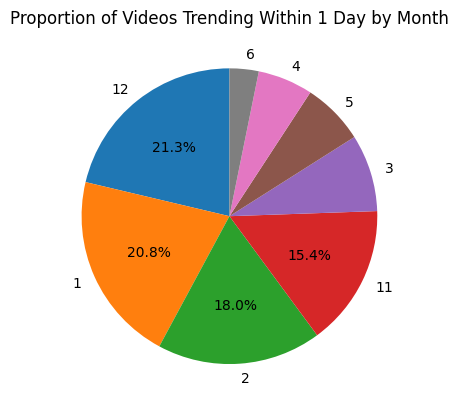

In [66]:
one_day_trending['publish_time'].dt.month.value_counts().plot.pie(startangle=90, autopct=lambda pct: autopct_func(pct, 10))
plt.title(label='Proportion of Videos Trending Within 1 Day by Month')
plt.ylabel(ylabel='')
plt.show()

**COMMENTS**
- Over 75% of videos that trend within a day are published between November and February, indicating that there are more hot topics or that people consume videos at a much faster rate during these months.

### **Question 6: What is the duration for which videos stay on the YouTube Trending Board?**

In [97]:
trending_duration = us_videos.groupby(by='video_id', as_index=False).agg(
    category = ('category', 'first'),
    trending_duration = ('trending_date', 'count')
)

trending_duration.head()

,video_id,category,trending_duration
0,-0CMnp02rNY,Entertainment,6
1,-0NYY8cqdiQ,Entertainment,1
2,-1Hm41N0dUs,Comedy,3
3,-1yT-K3c6YI,People & Blogs,4
4,-2RVw2_QyxQ,Education,3


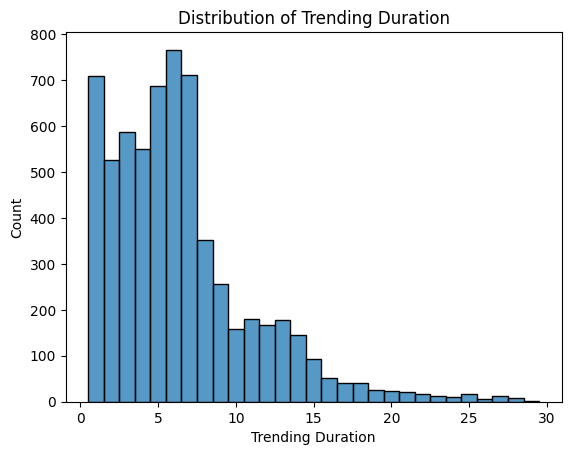

In [98]:
sns.histplot(data=trending_duration['trending_duration'], discrete=True)
plt.title('Distribution of Trending Duration')
plt.xlabel('Trending Duration')
plt.show()

**COMMENTS**
- Most videos on the YouTube Trending Board typically have a short lifespan of about a week, with the majority trending for less than 10 days.

## **Channels**

### **Question 7: What is the number of channels?**

In [328]:
print(f'The number of channels: {us_videos['channel_title'].nunique()}')

The number of channels: 2207


### **Question 8: Which channels feature the highest number of trending videos?**

In [329]:
videos_by_channel = us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False)
videos_by_channel

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
Netflix                                   58
                                          ..
Jon Olsson                                 1
JohnnyQ90                                  1
Johnny Jansen                              1
JohnNewmanVEVO                             1
ìêµ­ë¨ì Korean Englishman             1
Name: video_id, Length: 2207, dtype: int64

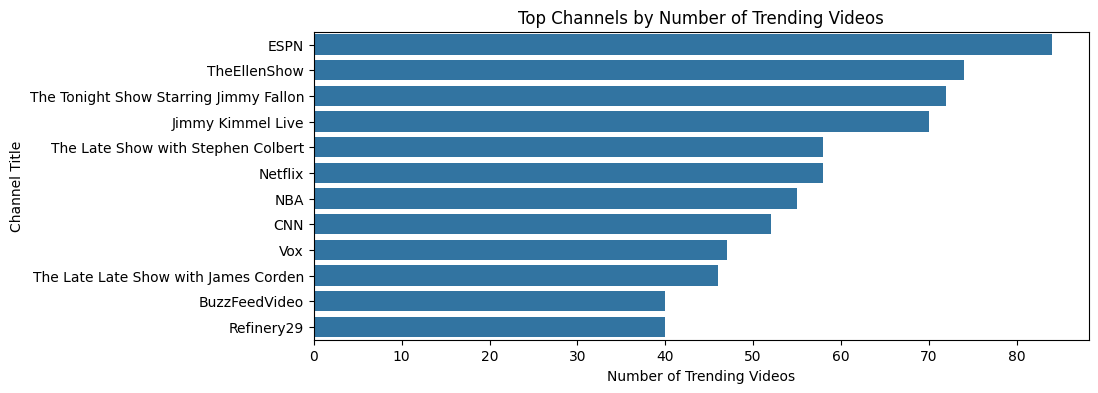

In [191]:
plt.figure(figsize=(10, 4))
sns.barplot(data=videos_by_channel[videos_by_channel >= 40], orient='h')
plt.title(label='Top Channels by Number of Trending Videos')
plt.xlabel(xlabel='Number of Trending Videos')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 9: Which channels have the highest number of published categories?**

In [331]:
categories_by_channel = us_videos.groupby(by='channel_title', as_index=False)['category'].nunique().sort_values(by='category', ascending=False)
categories_by_channel.head()

,channel_title,category
807,INSIDER,7
1935,ViralHog,7
1265,National Geographic,6
1713,Teen Vogue,5
1950,WIRED,5


In [332]:
categories_by_channel['category_segment'] = np.where(
    categories_by_channel['category'] == 1, '1', '2 -> 7'
)

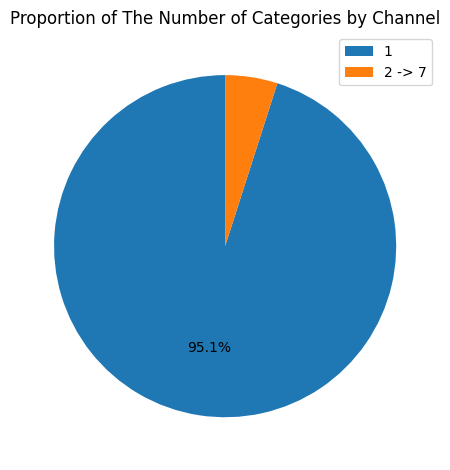

In [67]:
categories_by_channel['category_segment'].value_counts().plot.pie(labels=None, startangle=90, autopct=lambda pct: autopct_func(pct, 90))
plt.title(label='Proportion of The Number of Categories by Channel')
plt.ylabel(ylabel='')
plt.legend(['1', '2 -> 7'])
plt.tight_layout()
plt.show()

**COMMENTS**
- While most channels tend to focus on a single category of videos, some channels manage to trend across multiple categories. Notably, 2 channels have videos trending in 7 different categories, showcasing their versatility and talent.

### **Question 10: Which channels receive the most average views, likes, dislikes, and comments?**

In [334]:
latest_trending_date = us_videos.groupby(by='video_id', as_index=False)['trending_date'].max()
latest_trending_date = latest_trending_date.merge(right=us_videos, on=['video_id', 'trending_date'])

#### **Views**

In [193]:
views_by_channel = latest_trending_date.groupby(by='channel_title', as_index=False)['views'].mean().sort_values(by='views', ascending=False).head(n=10)
views_by_channel

,channel_title,views
357,ChildishGambinoVEVO,"225,211,923.00"
176,BeckyGVEVO,"139,334,502.00"
1812,TheWeekndVEVO,"122,544,931.00"
1061,LuisFonsiVEVO,"102,012,605.00"
1103,MalumaVEVO,"73,570,842.00"
531,DrakeVEVO,"60,635,812.00"
984,Kylie Jenner,"56,111,957.00"
324,Cardi B,"55,897,560.00"
1555,Selena Gomez,"54,863,912.00"
109,ArianaGrandeVevo,"50,911,589.67"


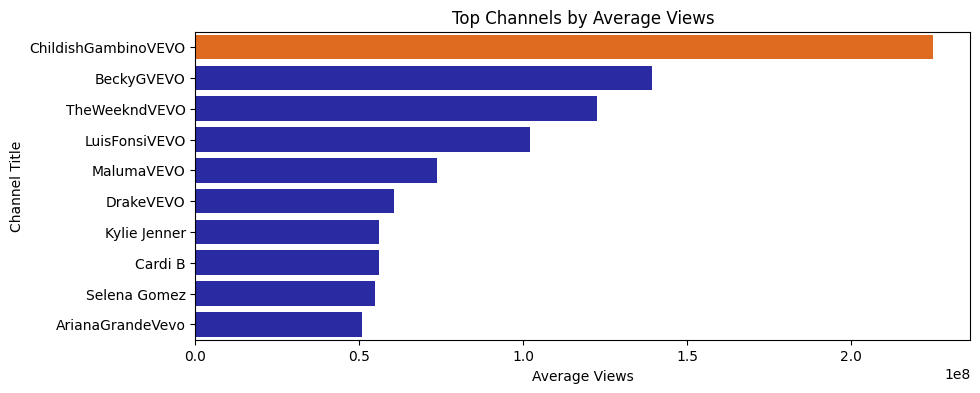

In [195]:
plt.figure(figsize=(10, 4))
sns.barplot(data=views_by_channel, x='views', y='channel_title', orient='h',
            hue='channel_title', palette=['#FF6400' if count > 2*10**8 else '#1616B7' for count in views_by_channel['views']])
plt.title(label='Top Channels by Average Views')
plt.xlabel(xlabel='Average Views')
plt.ylabel(ylabel='Channel Title')
plt.show()

**COMMENTS**
- 7 out of 10 channels with the highest average view counts collaborated with `Vevo`, a multinational video hosting service. The end of 2017 and the beginning of 2018 marked a time of growth for `Vevo`, thanks to its partnership with YouTube.

#### **Likes**

In [196]:
likes_by_channel = latest_trending_date.groupby(by='channel_title', as_index=False)['likes'].mean().sort_values(by='likes', ascending=False).head(n=10)
likes_by_channel

,channel_title,likes
357,ChildishGambinoVEVO,"5,023,450.00"
2085,ibighit,"2,438,628.22"
1061,LuisFonsiVEVO,"2,376,636.00"
471,David Dobrik,"2,032,463.00"
1812,TheWeekndVEVO,"1,427,436.00"
176,BeckyGVEVO,"1,425,496.00"
1050,Logan Paul Vlogs,"1,405,268.75"
490,Desimpedidos,"1,121,217.00"
324,Cardi B,"1,098,608.50"
109,ArianaGrandeVevo,"1,097,980.33"


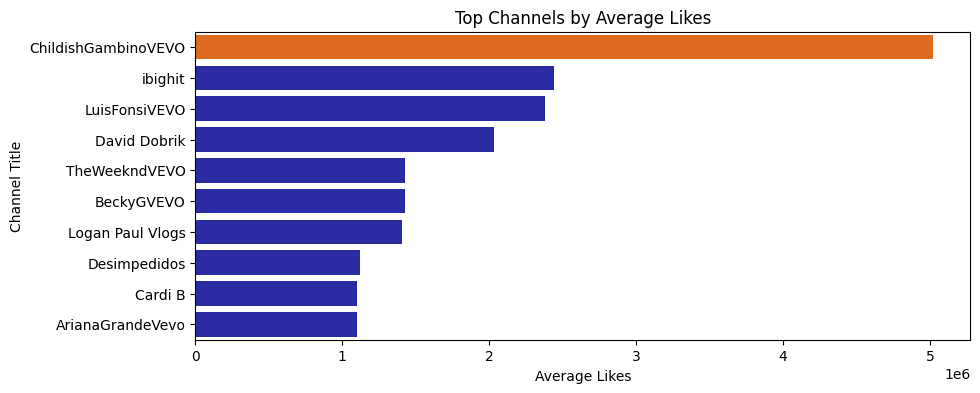

In [199]:
plt.figure(figsize=(10, 4))
sns.barplot(data=likes_by_channel, x='likes', y='channel_title', orient='h',
            hue='channel_title', palette=['#FF6400' if count > 4*10**6 else '#1616B7' for count in likes_by_channel['likes']])
plt.title(label='Top Channels by Average Likes')
plt.xlabel(xlabel='Average Likes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Dislikes**

In [200]:
dislikes_by_channel = latest_trending_date.groupby(by='channel_title', as_index=False)['dislikes'].mean().sort_values(by='dislikes', ascending=False).head(n=10)
dislikes_by_channel

,channel_title,dislikes
1050,Logan Paul Vlogs,"651,109.50"
2002,YouTube Spotlight,"590,677.33"
357,ChildishGambinoVEVO,"343,541.00"
453,Daily Caller,"228,426.00"
2157,shakiraVEVO,"124,281.00"
306,Call of Duty,"122,546.50"
176,BeckyGVEVO,"119,798.00"
1061,LuisFonsiVEVO,"117,196.00"
584,Erika Costell,"104,831.00"
471,David Dobrik,"101,678.00"


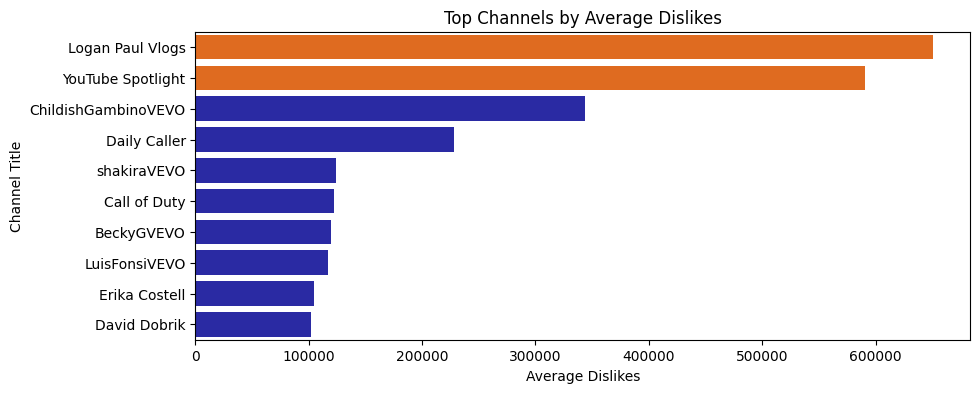

In [201]:
plt.figure(figsize=(10, 4))
sns.barplot(data=dislikes_by_channel, x='dislikes', y='channel_title', orient='h',
            hue='channel_title', palette=['#FF6400' if count > 500000 else '#1616B7' for count in dislikes_by_channel['dislikes']])
plt.title(label='Top Channels by Average Dislikes')
plt.xlabel(xlabel='Average Dislikes')
plt.ylabel(ylabel='Channel Title')
plt.show()

In [341]:
us_videos[us_videos['channel_title'].isin(dislikes_by_channel.index)].groupby(by=['channel_title', 'video_id'])['category'].first().value_counts()

category
Entertainment            6
Music                    4
People & Blogs           3
Gaming                   2
Nonprofits & Activism    1
Name: count, dtype: int64

**COMMENTS**
- Lots of channels received a significant average number of likes and dislikes due to reaching a larger audience.

#### **Comments**

In [202]:
comments_by_channel = latest_trending_date.groupby(by='channel_title', as_index=False)['comment_count'].mean().sort_values(by='comment_count', ascending=False).head(n=10)
comments_by_channel

,channel_title,comment_count
1050,Logan Paul Vlogs,"658,084.25"
357,ChildishGambinoVEVO,"517,232.00"
2085,ibighit,"377,834.00"
471,David Dobrik,"320,194.00"
2002,YouTube Spotlight,"302,081.33"
1717,The ACE Family,"193,355.00"
411,Collins Key,"157,166.00"
1792,TheAngryGrandpaShow,"137,276.50"
1061,LuisFonsiVEVO,"134,224.00"
2103,jypentertainment,"104,597.00"


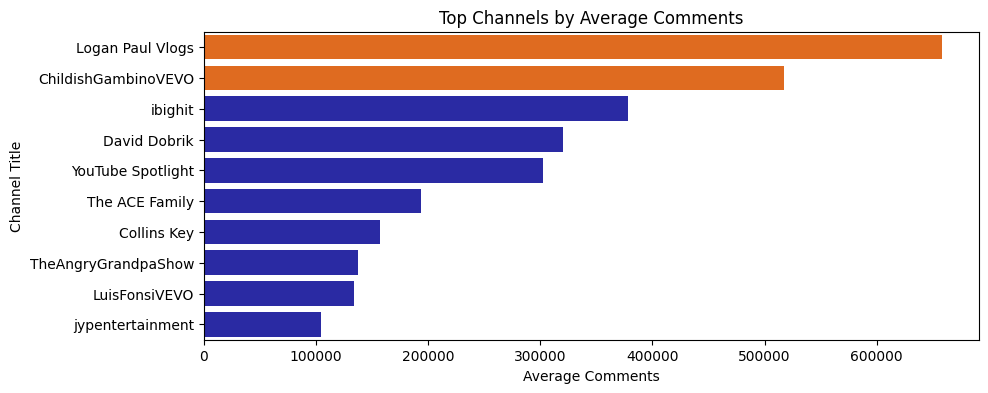

In [203]:
plt.figure(figsize=(10, 4))
sns.barplot(data=comments_by_channel, x='comment_count', y='channel_title', orient='h',
            hue='channel_title', palette=['#FF6400' if count > 400000 else '#1616B7' for count in comments_by_channel['comment_count']])
plt.title(label='Top Channels by Average Comments')
plt.xlabel(xlabel='Average Comments')
plt.ylabel(ylabel='Channel Title')
plt.show()

**COMMENTS**
- `Logan Paul Vlogs` faced a significant average number of dislikes and (negative) comments due to his insensitive, disrespectful, and exploitative behavior in his videos at Japan in late 2017.

### **Question 11: Which channels have the best average ratio of likes to dislikes?**

In [204]:
likes_to_dislikes = latest_trending_date.copy()
likes_to_dislikes['likes_to_dislikes'] = likes_to_dislikes['likes'] / (likes_to_dislikes['dislikes'] + 1) # Avoid division by zero
likes_to_dislikes = likes_to_dislikes.groupby(by='channel_title', as_index=False)['likes_to_dislikes'].mean().sort_values(by='likes_to_dislikes', ascending=False).head(n=10)
likes_to_dislikes

,channel_title,likes_to_dislikes
1597,Smyang Piano,"1,195.00"
77,Amber Liu,602.80
961,KickThePj,565.26
537,Duan Mackenzie,498.07
1811,TheVampsVEVO,371.04
416,Conan Gray,369.04
966,Kingsley,362.43
459,DanAndPhilGAMES,317.17
1573,ShibSibs,311.60
56,Alex French Guy Cooking,294.30


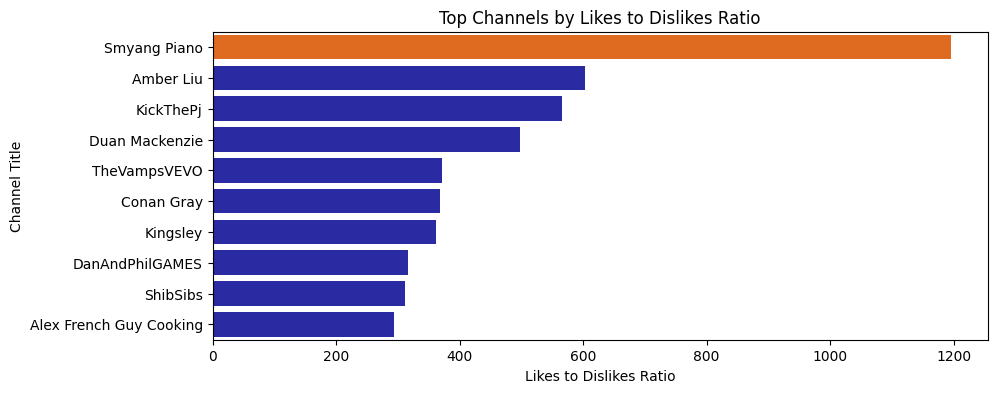

In [207]:
plt.figure(figsize=(10, 4))
sns.barplot(data=likes_to_dislikes, x='likes_to_dislikes', y='channel_title', orient='h',
            hue='channel_title', palette=['#FF6400' if count > 1000 else '#1616B7' for count in likes_to_dislikes['likes_to_dislikes']])
plt.title(label='Top Channels by Likes to Dislikes Ratio')
plt.xlabel(xlabel='Likes to Dislikes Ratio')
plt.ylabel(ylabel='Channel Title')
plt.show()

**COMMENTS**
- The top videos with the highest average number of likes didn't appear among those with the best likes to dislikes ratio.

## **Seasonality**

### **Question 12: Which months see the highest number of published videos?**

In [346]:
videos_by_publish_month = us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()
videos_by_publish_month

publish_time
1     1269
2      995
3      688
4      537
5      541
6      147
7        4
8        6
9       10
10      17
11     972
12    1167
Name: video_id, dtype: int64

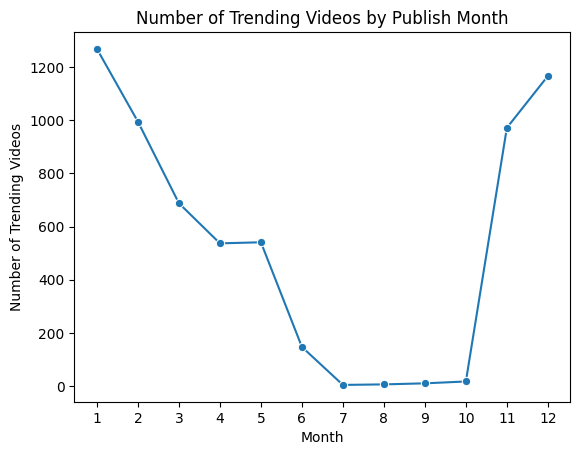

In [347]:
sns.lineplot(data=videos_by_publish_month, marker='o')
plt.title(label='Number of Trending Videos by Publish Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

**COMMENTS**
- A significant amount of trending videos were published between November and February.
- There is a sharp decrease in the number of trending videos from January to June.
- Because of the short lifespan of trending videos, typically a week, the absence of data for trending videos from July to October results in imbalanced amount of data for videos published during that period.

### **Question 13: Which months or weekdays see the highest number of trending videos?**

### **Months**

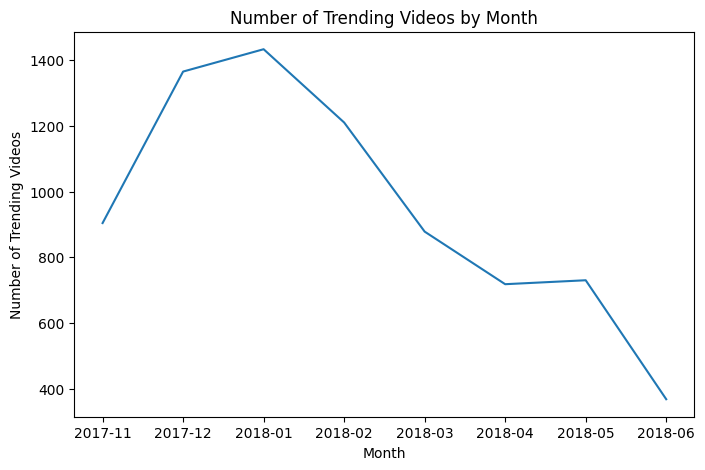

In [51]:
trending_by_month = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_month['trending_month'] = trending_by_month['trending_date'].astype(str).str[:7]
trending_by_month.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=trending_by_month.groupby(by='trending_month')['video_id'].nunique())
plt.title(label='Number of Trending Videos by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

**COMMENTS**
- The number of trending videos saw a rapid rise from November 2017 to January 2018, followed by a significant decline until June 2018.
- Some reasons for the increase in YouTube videos conjumption:
    - Smartphone ownership become widespread globally.
    - The rise of live streaming on Twitch and YouTube.
    - The rise of short-form video content.

### **WEEKDAYS**

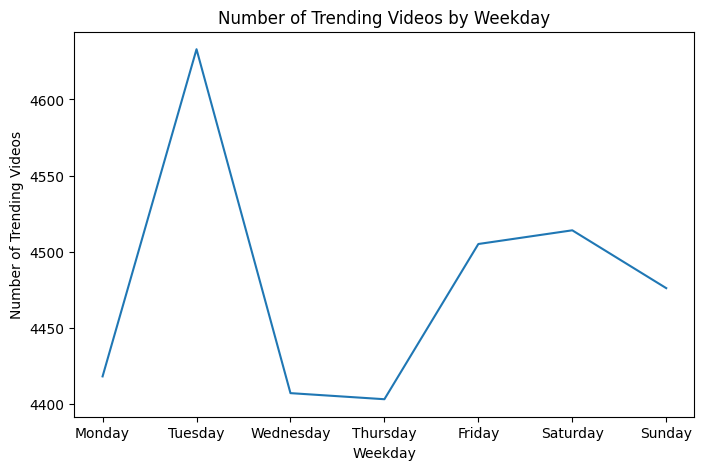

In [52]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trending_by_weekday = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_weekday['trending_weekday'] = trending_by_weekday['trending_date'].dt.day_name()
trending_by_weekday.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=trending_by_weekday.groupby(by='trending_weekday')['video_id'].nunique().reindex(days_order))
plt.title(label='Number of Trending Videos by Weekday')
plt.xlabel(xlabel='Weekday')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

**COMMENTS**
- While Tuesday sees the highest number of trending videos, we should further investigate the cause of this suspicious spike.
- Furthermore, Wednesday and Thursday show the lowest number of trending video, indicating that uploading during the weekdays may be risky.
- The number of trending videos are moderate over the weekend, suggesting that YouTubers should consider uploading videos from Friday to Sunday.

## **Title**

### **Question 14: How many videos have titles that are capitalized or non-capitalized?**

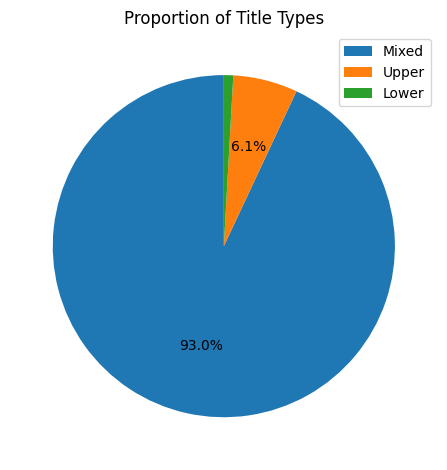

In [68]:
title_types = us_videos.loc[:, ['video_id', 'title']]
title_types['type'] = np.where(
    title_types['title'] == title_types['title'].str.upper(), 'upper', np.where(
        title_types['title'] == title_types['title'].str.lower(), 'lower', 'mixed'
    )
)

title_types['type'].value_counts().plot.pie(labels=None, startangle=90, autopct=lambda pct: autopct_func(pct, 1))
plt.title(label='Proportion of Title Types')
plt.ylabel(ylabel='')
plt.legend(['Mixed', 'Upper', 'Lower'])
plt.tight_layout()
plt.show()

**COMMENTS**
- Most of the trending videos have titles that combine uppercase and lowercase characters.

### **Question 15: What is the length of videos' title?**

In [59]:
title_length = us_videos.loc[:, ['title', 'views']].drop_duplicates(subset=['title'], keep='last')
title_length['title_length'] = title_length['title'].str.len()
title_length.head()

,title,views,title_length
10,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,81377,86
36,TL;DW - Every DCEU Movie Before Justice League,288922,46
41,Iraq-Iran earthquake: Deadly tremor hits borde...,34785,65
44,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",321053,75
46,People are Awesome & The Pet Collective presen...,69844,65


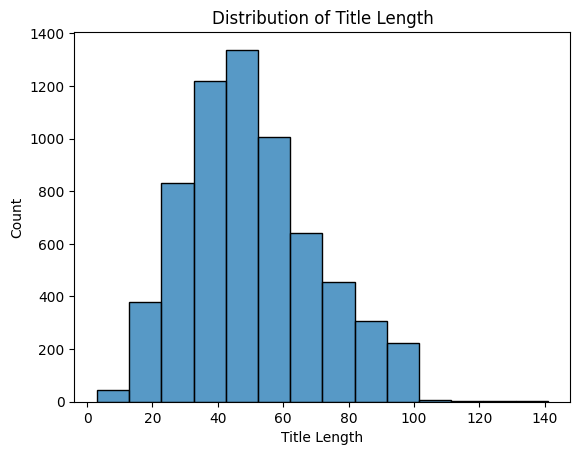

In [60]:
sns.histplot(data=title_length['title_length'], binwidth=10)
plt.title(label='Distribution of Title Length')
plt.xlabel(xlabel='Title Length')
plt.show()

**COMMENTS**
- The length of videos' title follow the normal distribution.
- Additionally, is there a relationship between the title length and the popularity of the video?

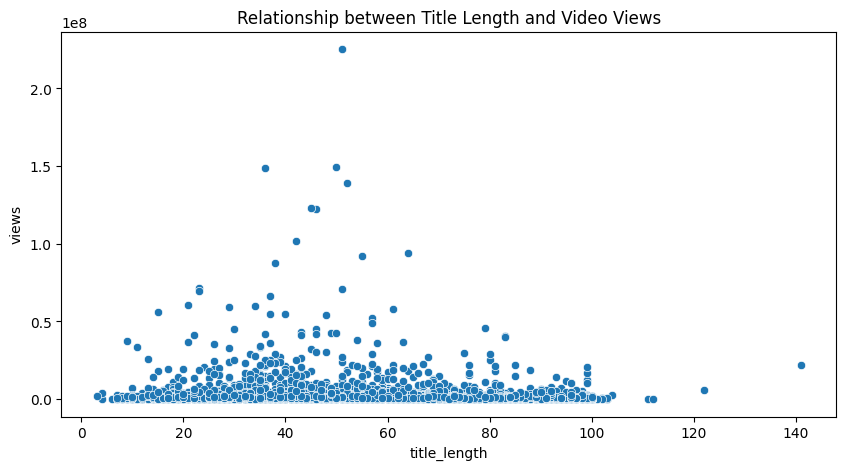

In [211]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=title_length, x='title_length', y='views')
plt.title(label='Relationship between Title Length and Video Views')
plt.show()

**COMMENTS**
- The chart above indicates that video titles between 30 and 60 characters generally receive higher views.
- Thus, we recommend that YouTubers make their titles as concise as possible, but not too short!

## **Categories**

### **Question 16: What categories are the most common?**

In [81]:
videos_by_category = us_videos.groupby(by='category', as_index=False)['video_id'].nunique().sort_values(by='video_id', ascending=False, ignore_index=True)
videos_by_category.rename(columns={'video_id': 'video_count'}, inplace=True)
videos_by_category.head()

,category,video_count
0,Entertainment,1622
1,Music,801
2,Howto & Style,595
3,Comedy,547
4,News & Politics,507


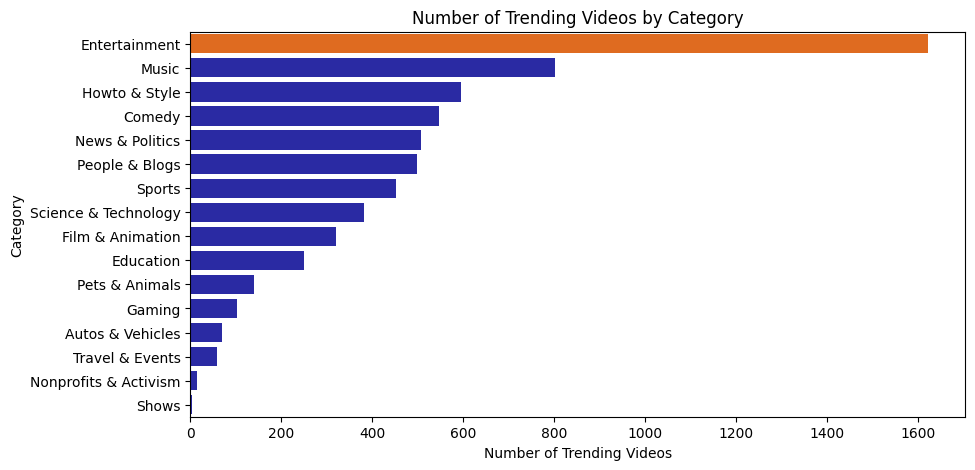

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(data=videos_by_category, x='video_count', y='category', orient='h',
            hue='category', palette=['#FF6400' if count > 1400 else '#1616B7' for count in videos_by_category['video_count']])
plt.title(label='Number of Trending Videos by Category')
plt.xlabel(xlabel='Number of Trending Videos')
plt.ylabel(ylabel='Category')
plt.show()

**COMMENTS**
- During this time frame, videos in the `Entertainment` category garnered the most trending videos on YouTube, significantly higher than the second category `Music`.

### **Question 17: What is the average trending duration for these categories?**

In [108]:
trending_duration_by_category = trending_duration.groupby(by='category', as_index=False)['trending_duration'].mean()
trending_duration_by_category = trending_duration_by_category.merge(right=videos_by_category, on='category')
trending_duration_by_category.sort_values(by='trending_duration', ascending=False, ignore_index=True, inplace=True)
trending_duration_by_category

,category,trending_duration,video_count
0,Shows,14.25,4
1,Music,8.08,801
2,Gaming,7.92,103
3,Film & Animation,7.35,321
4,Howto & Style,6.97,595
5,Travel & Events,6.73,60
6,Education,6.61,251
7,Pets & Animals,6.56,141
8,People & Blogs,6.48,498
9,Comedy,6.34,547


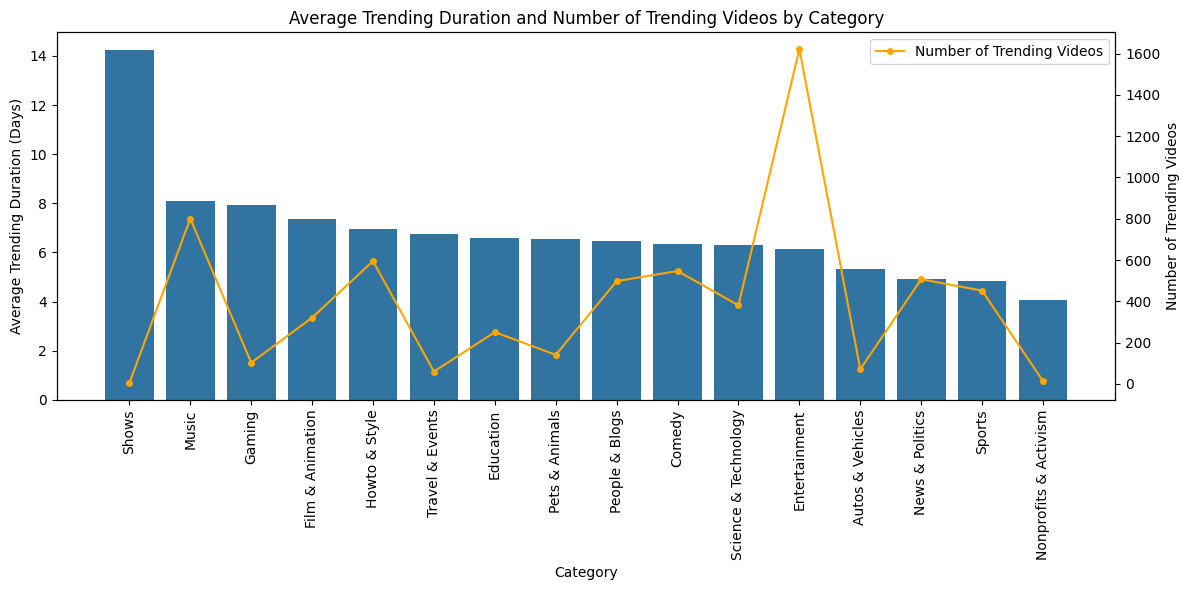

In [145]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.barplot(data=trending_duration_by_category, x='category', y='trending_duration', ax=ax1)
ax1.set_ylabel('Average Trending Duration (Days)')
ax1.set_xlabel('Category')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(data=trending_duration_by_category, x='category', y='video_count', color='orange', marker='o', markersize=5, markeredgewidth=0, ax=ax2)
ax2.set_ylabel('Number of Trending Videos')

plt.title(label='Average Trending Duration and Number of Trending Videos by Category')
plt.legend(labels=['Number of Trending Videos'])
plt.tight_layout()
plt.show()

**COMMENTS**
- The `Shows` category tend to stay on trending lists the longest, suggesting they have sustained viewer interest.
- Meanwhile, categories like `Entertainment` and `Music` dominate in terms of the number of trending videos but have shorter average trending durations, indicating frequent but short-lived popularity.
- Niche categories like `Nonprofits & Activism` have the least impact, with both low numbers of trending videos and short durations.

### **Question 18: What categories receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [158]:
views_by_category = latest_trending_date.groupby(by='category', as_index=False)['views'].mean().sort_values(by='views', ascending=False)
views_by_category

,category,views
7,Music,"6,027,683.07"
4,Film & Animation,"2,545,386.87"
5,Gaming,"2,325,086.77"
9,Nonprofits & Activism,"2,218,900.64"
3,Entertainment,"1,744,878.64"
0,Autos & Vehicles,"1,449,487.13"
14,Sports,"1,424,029.47"
1,Comedy,"1,422,506.79"
10,People & Blogs,"1,348,809.47"
12,Science & Technology,"1,124,489.02"


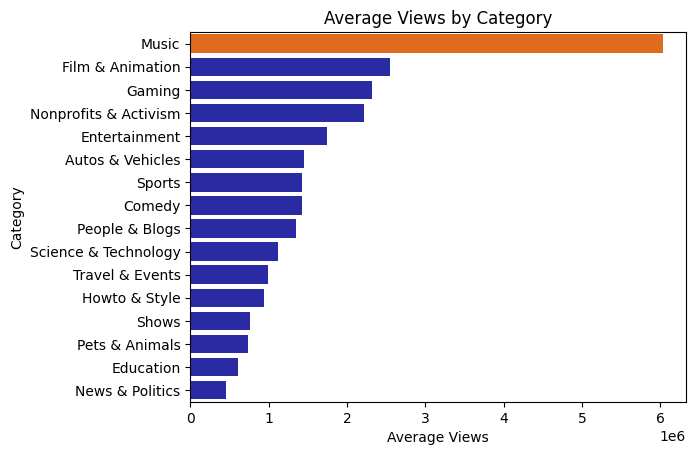

In [161]:
sns.barplot(data=views_by_category, x='views', y='category', orient='h',
            hue='category', palette=['#FF6400' if views > 5000000 else '#1616B7' for views in views_by_category['views']])
plt.title(label='Average Views by Category')
plt.xlabel(xlabel='Average Views')
plt.ylabel(ylabel='Category')
plt.show()

**COMMENTS**
- The `Music` category achieved a notably high average view count.

#### **Likes**

In [162]:
likes_by_category = latest_trending_date.groupby(by='category', as_index=False)['likes'].mean().sort_values(by='likes', ascending=False)
likes_by_category

,category,likes
7,Music,"188,067.01"
9,Nonprofits & Activism,"170,616.00"
5,Gaming,"67,877.34"
1,Comedy,"55,074.79"
4,Film & Animation,"52,123.81"
10,People & Blogs,"46,464.98"
3,Entertainment,"41,601.24"
6,Howto & Style,"34,758.22"
14,Sports,"28,027.03"
12,Science & Technology,"26,682.41"


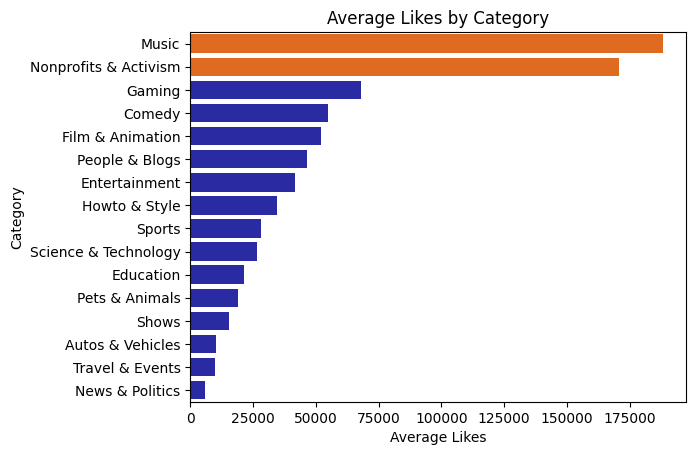

In [167]:
sns.barplot(data=likes_by_category, x='likes', y='category', orient='h',
            hue='category', palette=['#FF6400' if likes > 150000 else '#1616B7' for likes in likes_by_category['likes']])
plt.title(label='Average Likes by Category')
plt.xlabel(xlabel='Average Likes')
plt.ylabel(ylabel='Category')
plt.show()

**COMMENTS**
- Although the `Nonprofits & Activism` category may not have had a high average view count, but it did achieve a remarkably high average like count, almost matching that of the `Music` category.

#### **Dislikes**

In [163]:
dislikes_by_category = latest_trending_date.groupby(by='category', as_index=False)['dislikes'].mean().sort_values(by='dislikes', ascending=False)
dislikes_by_category

,category,dislikes
9,Nonprofits & Activism,"40,233.00"
7,Music,"6,572.41"
5,Gaming,"6,067.88"
3,Entertainment,"4,152.06"
10,People & Blogs,"2,782.71"
4,Film & Animation,"2,143.93"
1,Comedy,"1,962.33"
14,Sports,"1,775.49"
8,News & Politics,"1,527.44"
12,Science & Technology,"1,438.29"


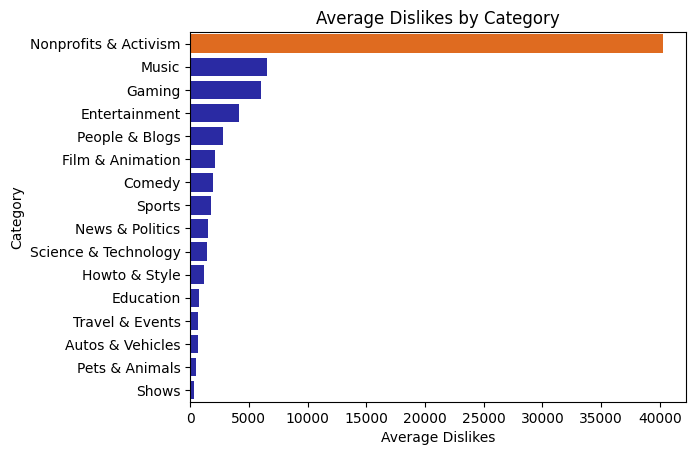

In [169]:
sns.barplot(data=dislikes_by_category, x='dislikes', y='category', orient='h',
            hue='category', palette=['#FF6400' if dislikes > 35000 else '#1616B7' for dislikes in dislikes_by_category['dislikes']])
plt.title(label='Average Dislikes by Category')
plt.xlabel(xlabel='Average Dislikes')
plt.ylabel(ylabel='Category')
plt.show()

**COMMENTS**
- The `Nonprofits & Activism` category experienced both a high average of likes and dislikes due to its appeal to a wide range of perspectives.

#### **Comments**

In [164]:
comments_by_category = latest_trending_date.groupby(by='category', as_index=False)['comment_count'].mean().sort_values(by='comment_count', ascending=False)
comments_by_category

,category,comment_count
9,Nonprofits & Activism,"52,888.00"
7,Music,"16,061.28"
5,Gaming,"13,463.27"
10,People & Blogs,"6,167.60"
4,Film & Animation,"6,110.94"
3,Entertainment,"6,106.79"
1,Comedy,"5,489.94"
6,Howto & Style,"4,872.75"
12,Science & Technology,"3,651.22"
14,Sports,"3,318.36"


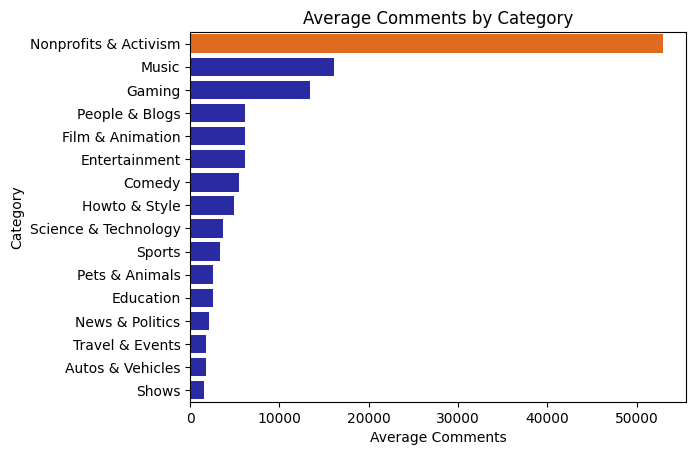

In [171]:
sns.barplot(data=comments_by_category, x='comment_count', y='category', orient='h',
            hue='category', palette=['#FF6400' if comments > 40000 else '#1616B7' for comments in comments_by_category['comment_count']])
plt.title(label='Average Comments by Category')
plt.xlabel(xlabel='Average Comments')
plt.ylabel(ylabel='Category')
plt.show()

**COMMENTS**
- `Nonprofits & Activism` category stands out for its exceptionally high average of comments. This suggests that the videos in this category frequently ignite conversations and discussions among viewers, likely because of the content's impactful, polarizing, or thought-provoking qualities.

## **Tags**

### **Question 19: What tags are the most common?**

In [174]:
tags_dict = Counter([tag.replace('"', '') for tags in us_videos['tags'].str.split('|') for tag in tags if tag != '[none]'])
common_tags = pd.DataFrame(data=tags_dict.most_common(10), columns=['tag', 'count'])
common_tags

,tag,count
0,funny,3597
1,comedy,2927
2,how to,1602
3,music,1298
4,Pop,1278
5,2018,1270
6,humor,1184
7,food,1159
8,science,1111
9,review,1004


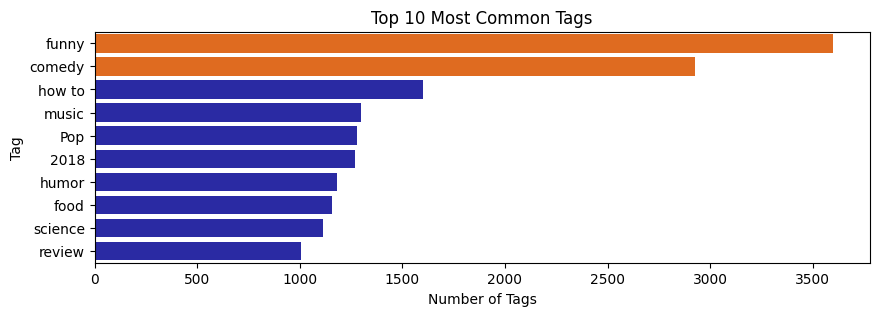

In [181]:
plt.figure(figsize=(10, 3))
sns.barplot(data=common_tags, x='count', y='tag', orient='h',
            hue='tag', palette=['#FF6400' if count > 2500 else '#1616B7' for count in common_tags['count']])
plt.title(label='Top 10 Most Common Tags')
plt.xlabel(xlabel='Number of Tags')
plt.ylabel(ylabel='Tag')
plt.show()

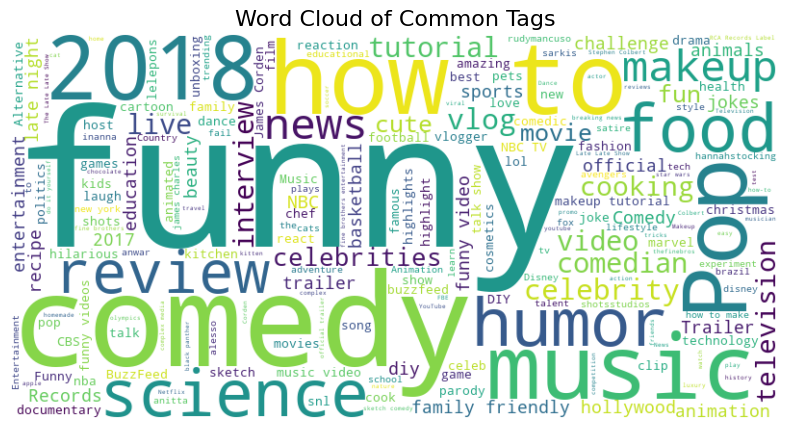

In [189]:
# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tags_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(X=wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Tags', fontsize=16)
plt.show()

**COMMENTS**
- The word cloud and bar plot clearly show that the tags `funny` and `comedy` are significantly larger, indicating the trend towards funny videos in this period.

## **Conclusion**

After conducting thorough analysis and addressing various questions to uncover insights from the data, these are the key takeaways:
- Firstly, the `Entertainment` and `Music` categories generally receive more views and maintain trending status for long periods.
- Secondly, once the appropriate category is chosen, identify the best time to release your video is essential. To enhance audience engagement, we recommend publishing between November and February.
- Thirdly, tags likes `funny`, `comedy`, and `humor` indicate the popularity of humorous videos during that time.
- Finally, gathering additional data on typical videos is essential for further analysis and identifying the main factors that lead to a video's popularity.

## **Reflection**
<center>

| <center> Name </center> | <center> Difficulties </center> | <center> Things Learn </center> |
| --- | --- | --- |
| Trần Nguyễn Nhật Cường | - Many videos share the same id but have different titles or channel names. <br> - The absence of trending videos in autumn left our seasonality analysis incomplete. <br> - Data only contains trending videos, thus our analysis is limited. | - Improve my skills in time and tasks management. <br> - Enhance the ability to ask insightful questions. <br> - Generate better charts for data visualization. |
| Nguyễn Công Tuấn | - The dataset only recorded trending videos from the last two months of 2017 and the first six months of 2018, leading to an imbalance in the number of trending videos across years. | - Improved skills in selecting and creating diverse plot types to effectively visualize and interpret data. <br> - Learned and practiced how to write more meaningful comments and conclusions by analyzing problems from a broad perspective (overall) before delving into details. |
| Trần Đăng Tuấn | - Columns like title, tags, and description are textual and may contain diverse or ambiguous terms, making keyword-based searches challenging. <br> - A single video can appear multiple times in the dataset if it trended on different dates. | - Enhance in handling textual data include cleaning the data through steps like removing special characters, stopwords, and unnecessary text. <br> - Understand more about the data science process. |

</center>

## **References**
- No reference.